# PREPROCESSING

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_parquet('data_youtube_12082024_1606.parquet') #parquet so i can carry it around
data.shape

(824748, 28)

In [3]:
data.video_trending_country.value_counts()

video_trending_country
Papua New Guinea    11200
Venezuela           11200
Bolivia             11200
Chile               11200
Colombia            11200
                    ...  
Ukraine              3757
Zimbabwe             3712
Belarus              3400
Bangladesh           3130
Uganda               2981
Name: count, Length: 110, dtype: int64

In [4]:
data.columns

Index(['video_id', 'video_published_at', 'video_trending__date',
       'video_trending_country', 'channel_id', 'video_title',
       'video_description', 'video_default_thumbnail', 'video_category_id',
       'video_tags', 'video_duration', 'video_dimension', 'video_definition',
       'video_licensed_content', 'video_view_count', 'video_like_count',
       'video_comment_count', 'channel_title', 'channel_description',
       'channel_custom_url', 'channel_published_at', 'channel_country',
       'channel_view_count', 'channel_subscriber_count',
       'channel_have_hidden_subscribers', 'channel_video_count',
       'channel_localized_title', 'channel_localized_description'],
      dtype='object')

In [5]:
data.video_trending_country.value_counts()

video_trending_country
Papua New Guinea    11200
Venezuela           11200
Bolivia             11200
Chile               11200
Colombia            11200
                    ...  
Ukraine              3757
Zimbabwe             3712
Belarus              3400
Bangladesh           3130
Uganda               2981
Name: count, Length: 110, dtype: int64

In [6]:
data.shape

(824748, 28)

In [7]:
data = data.drop_duplicates()
data['video_published_at'] = pd.to_datetime(data['video_published_at'], errors='coerce', format='mixed')
data['video_trending__date'] = pd.to_datetime(data['video_trending__date'], errors='coerce',format='mixed')
data['channel_published_at'] = pd.to_datetime(data['channel_published_at'], errors='coerce',format='mixed')
data.isnull().sum()

video_id                                0
video_published_at                      0
video_trending__date                    0
video_trending_country                  0
channel_id                              0
video_title                             0
video_description                  132485
video_default_thumbnail                 0
video_category_id                     631
video_tags                         268362
video_duration                          0
video_dimension                         0
video_definition                        0
video_licensed_content                  0
video_view_count                       35
video_like_count                    10355
video_comment_count                  6409
channel_title                           0
channel_description                 62699
channel_custom_url                   2792
channel_published_at                    0
channel_country                    136003
channel_view_count                      0
channel_subscriber_count          

In [8]:
numeric_columns = ['video_view_count', 'video_like_count', 'video_comment_count',
                   'channel_view_count', 'channel_subscriber_count', 'channel_video_count']

invalid_values = {}
for col in numeric_columns:
    invalid_values[col] = {
        "negative_values": (data[col] < 0).sum(),
        "zero_values": (data[col] == 0).sum()
    }
    
    
print(invalid_values)

{'video_view_count': {'negative_values': 0, 'zero_values': 0}, 'video_like_count': {'negative_values': 0, 'zero_values': 0}, 'video_comment_count': {'negative_values': 0, 'zero_values': 2585}, 'channel_view_count': {'negative_values': 0, 'zero_values': 64}, 'channel_subscriber_count': {'negative_values': 0, 'zero_values': 0}, 'channel_video_count': {'negative_values': 0, 'zero_values': 15}}


In [9]:
zero_channel_views = data[data['channel_view_count'] == 0]
zero_channel_videos = data[data['channel_video_count'] == 0]

zero_channel_views_info = zero_channel_views[['channel_title', 'channel_view_count', 'channel_video_count', 'channel_subscriber_count']]
zero_channel_videos_info = zero_channel_videos[['channel_title', 'channel_view_count', 'channel_video_count', 'channel_subscriber_count']]

zero_channel_views_info

,channel_title,channel_view_count,channel_video_count,channel_subscriber_count
168831,JennieRubyJaneVEVO,0,0,1
169189,JennieRubyJaneVEVO,0,0,1
169487,JennieRubyJaneVEVO,0,0,1
169847,JennieRubyJaneVEVO,0,0,1
170061,JennieRubyJaneVEVO,0,0,1
...,...,...,...,...
794003,Zorana Mićanović,0,14,15500
797927,Zorana Mićanović,0,14,15500
808649,Zorana Mićanović,0,14,15500
812591,Zorana Mićanović,0,14,15600


In [10]:
data_cleaned = data[~((data['channel_view_count'] == 0) & (data['channel_video_count'] == 0))]
rows_removed = len(data) - len(data_cleaned)
remaining_rows = len(data_cleaned)
data_cleaned['video_description'].fillna("No description available", inplace=True)
data_cleaned['channel_description'].fillna("No description available", inplace=True)
data_cleaned['video_tags'].fillna("No tags", inplace=True)
data_cleaned['channel_country'].fillna("Unknown", inplace=True)
data_cleaned = data_cleaned.dropna(subset=['video_category_id'])
remaining_rows_after_cleaning = len(data_cleaned)

/tmp/ipykernel_2124/2741010046.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['video_description'].fillna("No description available", inplace=True)
/tmp/ipykernel_2124/2741010046.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['video_description'].fillna("No description available", inplace=True)
/tmp/ipykerne

In [11]:
print(rows_removed)
print(remaining_rows)
print(remaining_rows_after_cleaning)
print(data_cleaned.isna().sum())

9
824738
824107
video_id                               0
video_published_at                     0
video_trending__date                   0
video_trending_country                 0
channel_id                             0
video_title                            0
video_description                      0
video_default_thumbnail                0
video_category_id                      0
video_tags                             0
video_duration                         0
video_dimension                        0
video_definition                       0
video_licensed_content                 0
video_view_count                      35
video_like_count                   10340
video_comment_count                 6392
channel_title                          0
channel_description                    0
channel_custom_url                  2792
channel_published_at                   0
channel_country                        0
channel_view_count                     0
channel_subscriber_count               0


In [12]:
data_cleaned['channel_custom_url'].fillna("Unknown", inplace=True)
data_cleaned['channel_localized_description'].fillna("No localized description available", inplace=True)

/tmp/ipykernel_2124/2811296095.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['channel_custom_url'].fillna("Unknown", inplace=True)
/tmp/ipykernel_2124/2811296095.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [13]:
data_cleaned.isnull().sum()

video_id                               0
video_published_at                     0
video_trending__date                   0
video_trending_country                 0
channel_id                             0
video_title                            0
video_description                      0
video_default_thumbnail                0
video_category_id                      0
video_tags                             0
video_duration                         0
video_dimension                        0
video_definition                       0
video_licensed_content                 0
video_view_count                      35
video_like_count                   10340
video_comment_count                 6392
channel_title                          0
channel_description                    0
channel_custom_url                     0
channel_published_at                   0
channel_country                        0
channel_view_count                     0
channel_subscriber_count               0
channel_have_hid

In [14]:
# check the row null of video_view_count                     
data_cleaned[data_cleaned['video_view_count'].isnull()]['video_view_count']

# all the rows with NaN values for video_view_count, video_like_count, video_comment_count replaced with 0
data_cleaned['video_view_count'].fillna(0, inplace=True)
data_cleaned['video_like_count'].fillna(0, inplace=True)
data_cleaned['video_comment_count'].fillna(0, inplace=True)                                 

/tmp/ipykernel_2124/1735428938.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['video_view_count'].fillna(0, inplace=True)
/tmp/ipykernel_2124/1735428938.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [15]:
# drop rows with zero video_view_count
data_cleaned = data_cleaned[data_cleaned['video_view_count'] != 0]
data_cleaned.isnull().sum()

video_id                           0
video_published_at                 0
video_trending__date               0
video_trending_country             0
channel_id                         0
video_title                        0
video_description                  0
video_default_thumbnail            0
video_category_id                  0
video_tags                         0
video_duration                     0
video_dimension                    0
video_definition                   0
video_licensed_content             0
video_view_count                   0
video_like_count                   0
video_comment_count                0
channel_title                      0
channel_description                0
channel_custom_url                 0
channel_published_at               0
channel_country                    0
channel_view_count                 0
channel_subscriber_count           0
channel_have_hidden_subscribers    0
channel_video_count                0
channel_localized_title            0
c

In [16]:
data_cleaned['engagement_rate'] = (
    (data_cleaned['video_like_count'] + data_cleaned['video_comment_count']) /
    data_cleaned['video_view_count']
)
data_cleaned['engagement_rate'].head()

0    0.106899
1    0.000643
2    0.130919
3    0.000829
4    0.040684
Name: engagement_rate, dtype: float64

In [17]:
data_cleaned['engagement_rate'].describe()  

count    824072.000000
mean          0.040379
std           0.029447
min           0.000000
25%           0.019197
50%           0.033547
75%           0.053754
max           0.439204
Name: engagement_rate, dtype: float64

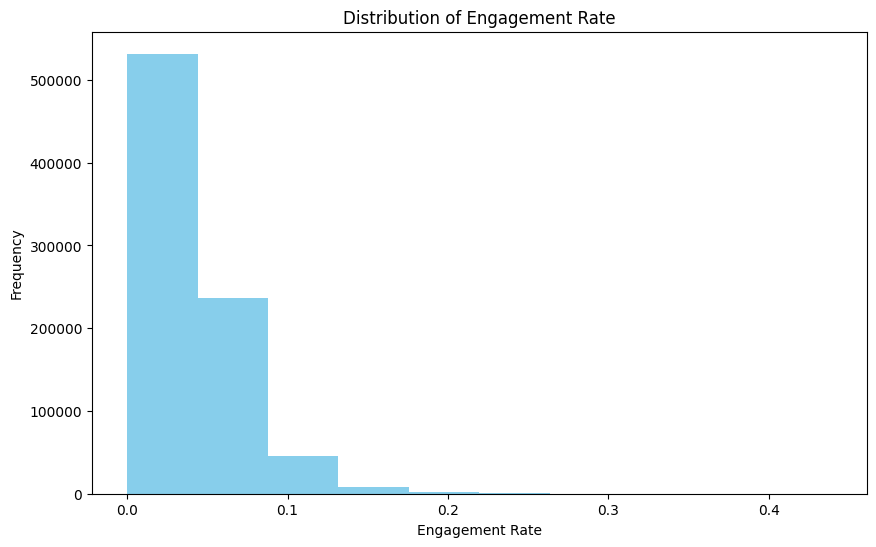

In [18]:
# plot engagement rate
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['engagement_rate'], color='skyblue')
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.show()

In [19]:
data_cleaned[['video_published_at', 'video_trending__date']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 824072 entries, 0 to 824747
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   video_published_at    824072 non-null  datetime64[ns, UTC]
 1   video_trending__date  824072 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1)
memory usage: 18.9 MB


In [20]:
data_cleaned['time_difference']  = data_cleaned['video_trending__date'] - data_cleaned['video_published_at'].dt.tz_localize(None)
data_cleaned[['video_trending__date', 'video_published_at', 'time_difference']]

,video_trending__date,video_published_at,time_difference
0,2024-10-12,2024-10-11 00:00:06+00:00,0 days 23:59:54
1,2024-10-12,2024-10-11 02:59:21+00:00,0 days 21:00:39
2,2024-10-12,2024-10-11 11:07:25+00:00,0 days 12:52:35
3,2024-10-12,2024-10-11 00:10:10+00:00,0 days 23:49:50
4,2024-10-12,2024-10-09 12:30:27+00:00,2 days 11:29:33
...,...,...,...
824743,2024-12-07,2024-11-29 16:00:08+00:00,7 days 07:59:52
824744,2024-12-07,2024-11-29 20:00:01+00:00,7 days 03:59:59
824745,2024-12-07,2024-12-01 15:00:25+00:00,5 days 08:59:35
824746,2024-12-07,2024-11-30 20:47:37+00:00,6 days 03:12:23


In [23]:
import pandas as pd
import isodate

data_cleaned['video_duration_seconds'] = data_cleaned['video_duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())
data_cleaned['video_duration_seconds'].head()

0     148.0
1     608.0
2    2604.0
3     609.0
4     132.0
Name: video_duration_seconds, dtype: float64

In [24]:
data_cleaned[['engagement_rate', 'time_difference', 'video_duration_seconds']].head()

,engagement_rate,time_difference,video_duration_seconds
0,0.106899,0 days 23:59:54,148.0
1,0.000643,0 days 21:00:39,608.0
2,0.130919,0 days 12:52:35,2604.0
3,0.000829,0 days 23:49:50,609.0
4,0.040684,2 days 11:29:33,132.0


# EDA

In [25]:
data_saved = data_cleaned.copy()
data_saved.shape

(824072, 31)

In [26]:
feature_stats = data_cleaned[['engagement_rate', 'time_difference', 'video_duration_seconds']].describe()

data_cleaned['time_difference_days'] = pd.to_timedelta(data_cleaned['time_difference']).dt.total_seconds() / (3600 * 24)
time_difference_stats = data_cleaned['time_difference_days'].describe()
feature_summary = pd.DataFrame({
    "Engagement Rate": feature_stats['engagement_rate'],
    "Video Duration (seconds)": feature_stats['video_duration_seconds'],
    "Time to Trend (days)": time_difference_stats
})
feature_summary 

,Engagement Rate,Video Duration (seconds),Time to Trend (days)
count,824072.000000,824072.000000,824072.000000
mean,0.040379,1046.421782,11.777235
std,0.029447,2450.386469,8.610450
min,0.000000,10.000000,-0.732535
25%,0.019197,46.000000,4.725613
50%,0.033547,225.000000,9.791597
75%,0.053754,1180.000000,17.416230
max,0.439204,50264.000000,37.083322


In [27]:
post_data_drop_id = data_cleaned.sort_values(by=['video_trending__date']).drop_duplicates(subset=['video_id'], keep='first')

In [28]:
# post_data_drop_id = data_cleaned.drop_duplicates(subset=['video_id'])
print(post_data_drop_id.shape)
post_data_drop_id.head()

(28667, 32)


,video_id,video_published_at,video_trending__date,video_trending_country,channel_id,video_title,video_description,video_default_thumbnail,video_category_id,video_tags,...,channel_view_count,channel_subscriber_count,channel_have_hidden_subscribers,channel_video_count,channel_localized_title,channel_localized_description,engagement_rate,time_difference,video_duration_seconds,time_difference_days
0,bB3-CUMERIU,2024-10-11 00:00:06+00:00,2024-10-12,United Arab Emirates,UCNYi_zGmR519r5gYdOKLTjQ,JENNIE - Mantra (Official Music Video),Official music video for “Mantra” by JENNIE ou...,https://i.ytimg.com/vi/bB3-CUMERIU/default.jpg,Music,"JENNIE,Mantra,제니,Jennie Mantra,Jennie from Bla...",...,464615150,11600000,False,43,JENNIE,No localized description available,0.106899,0 days 23:59:54,148.0,0.999931
10093,3QBE5eRW1xM,2024-10-07 16:00:10+00:00,2024-10-12,Indonesia,UCoIiiHof6BJ85PLuLkuxuhw,AKU KEMBALI KE KOTA BERKABUT INI.... Silent Hi...,​​Link Discord MotionIme buat cari temen baru:...,https://i.ytimg.com/vi/3QBE5eRW1xM/default.jpg,Gaming,"windah basudara,SAATNYA MEWUJUDKAN MIMPI KU ME...",...,3954309427,14400000,False,5274,Windah Basudara,Join discordku MotionIme guys linknya di bawah!\n,0.031862,4 days 07:59:50,7409.0,4.333218
10094,1Tw6eLo3W3s,2024-10-08 23:20:17+00:00,2024-10-12,Indonesia,UCRdwWPjiCuG37GIsnt4breg,Seperti Apa Kesiapan Suporter Timnas Penuhi St...,"BAHRAIN, KOMPAS.TV - Seperti Apa Kesiapan Supo...",https://i.ytimg.com/vi/1Tw6eLo3W3s/default.jpg,News & Politics,"kompastv,berita,berita daerah",...,79622705,254000,False,36548,KompasTV Makassar,Dikelola Redaksi Kompas TV Makassar.\nAlamat :...,0.015902,3 days 00:39:43,697.0,3.027581
10095,5fcmA08JlxI,2024-10-07 11:33:48+00:00,2024-10-12,Indonesia,UCzeRCr1-PmVfJRy6NDP1zbg,NO CUT NO EDIT!! CONGRATULATION KONSER SANG KE...,#leslar #rizkybillarlesti #BabyL #leslarentert...,https://i.ytimg.com/vi/5fcmA08JlxI/default.jpg,Entertainment,"Leslar,Rizky Billar,Lesti Kejora,Lesti,Billar,...",...,446287762,1950000,False,920,Leslar Entertainment,The official channel of Leslar Entertainment (...,0.088651,4 days 12:26:12,687.0,4.518194
10096,aDz1SzOh5I4,2024-10-08 08:00:00+00:00,2024-10-12,Indonesia,UCnAeEo7DLRY0H6gt7VuAHRQ,PANEN SEMANGKA GULA BUAT OLEH-OLEH KE BELANDA,No description available,https://i.ytimg.com/vi/aDz1SzOh5I4/default.jpg,People & Blogs,No tags,...,762655618,3910000,False,952,Keluarga Bahagia Di Jerman,\nEndorsement contact : kbdj.business@yahoo.co...,0.031591,3 days 16:00:00,746.0,3.666667


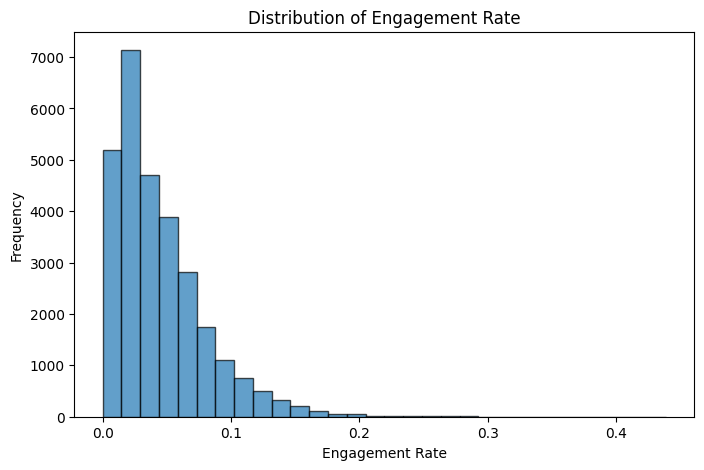

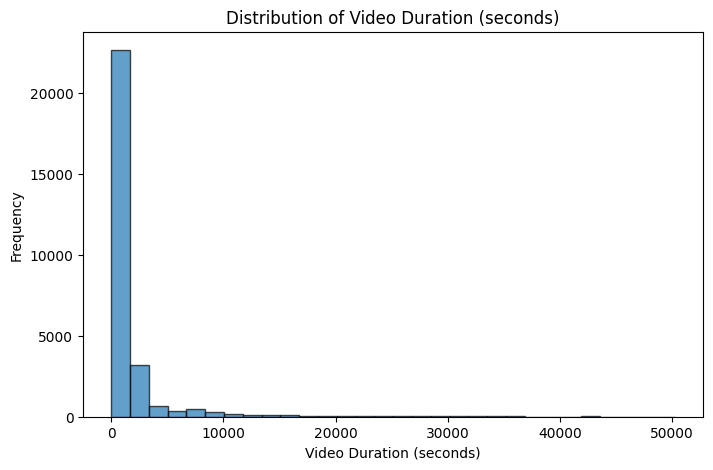

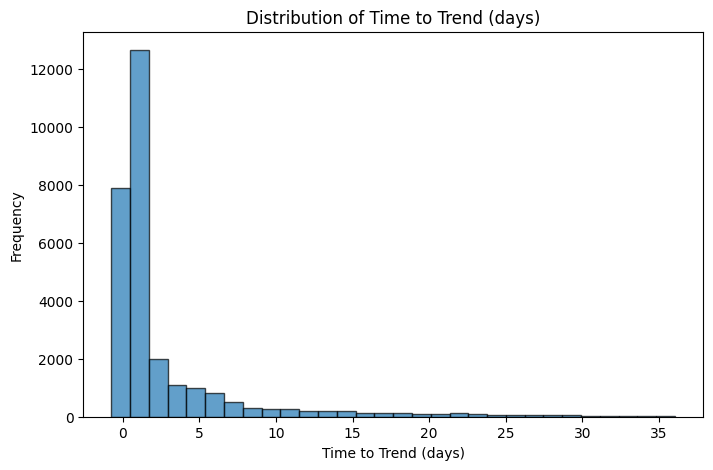

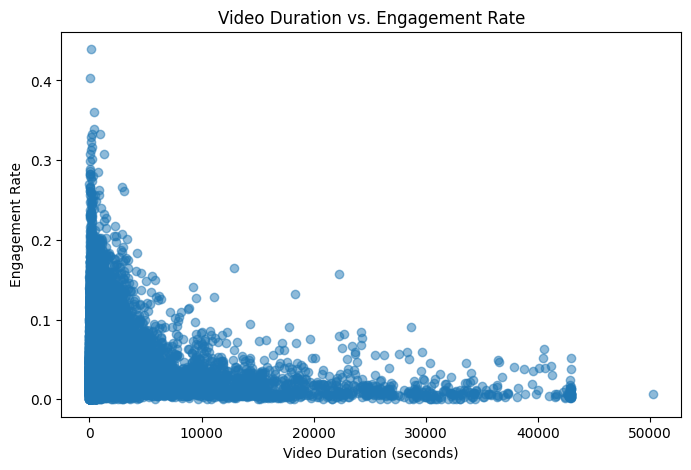

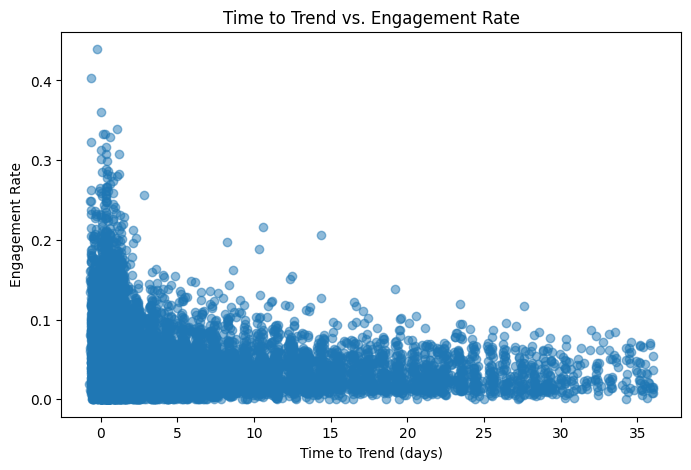

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(post_data_drop_id['engagement_rate'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(post_data_drop_id['video_duration_seconds'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Video Duration (seconds)')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Frequency')
plt.show() # viewer attention spans tend to be short, and platforms like youtube priortize shorter (youtube shorts, memes)

plt.figure(figsize=(8, 5))
plt.hist(post_data_drop_id['time_difference_days'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Time to Trend (days)')
plt.xlabel('Time to Trend (days)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(post_data_drop_id['video_duration_seconds'], post_data_drop_id['engagement_rate'], alpha=0.5)
plt.title('Video Duration vs. Engagement Rate')
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Engagement Rate')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(post_data_drop_id['time_difference_days'], post_data_drop_id['engagement_rate'], alpha=0.5)
plt.title('Time to Trend vs. Engagement Rate')
plt.xlabel('Time to Trend (days)')
plt.ylabel('Engagement Rate')
plt.show()

In [30]:
category_analysis_debug = post_data_drop_id.groupby('video_category_id').agg({
    'engagement_rate': 'mean',
    'video_duration_seconds': 'mean',
    'time_difference_days': 'mean'
}).rename(columns={'time_difference_days': 'avg_time_to_trend_days'})
category_analysis_debug

,engagement_rate,video_duration_seconds,avg_time_to_trend_days
video_category_id,,,
Autos & Vehicles,0.053869,1753.718884,2.143070
Comedy,0.052461,918.678746,3.684558
Education,0.055203,1256.031863,2.513365
Entertainment,0.042222,1435.100431,2.789230
Film & Animation,0.045366,1620.937908,3.154512
Gaming,0.060232,3254.344617,1.972995
Howto & Style,0.038275,611.457547,3.929419
Music,0.066102,447.775174,3.787826
News & Politics,0.024424,3659.666053,1.814417


In [31]:
country_analysis_debug = post_data_drop_id.groupby('video_trending_country').agg({
    'engagement_rate': 'mean',
    'video_duration_seconds': 'mean',
    'time_difference_days': 'mean'
}).rename(columns={'time_difference_days': 'avg_time_to_trend_days'})
country_analysis_debug

,engagement_rate,video_duration_seconds,avg_time_to_trend_days
video_trending_country,,,
Algeria,0.057353,999.366906,2.559390
Argentina,0.034985,569.217391,2.702634
Australia,0.030180,655.480315,1.972364
Austria,0.059991,1196.614396,1.745281
Azerbaijan,0.032788,1778.055944,5.748235
...,...,...,...
Uruguay,0.046217,1131.096774,6.277202
Venezuela,0.048431,630.318182,5.710362
Vietnam,0.022203,3234.882096,5.081256


In [32]:
top_categories_engagement = category_analysis_debug.sort_values('engagement_rate', ascending=False).head(10)
top_categories_trend = category_analysis_debug.sort_values('avg_time_to_trend_days', ascending=True).head(10)

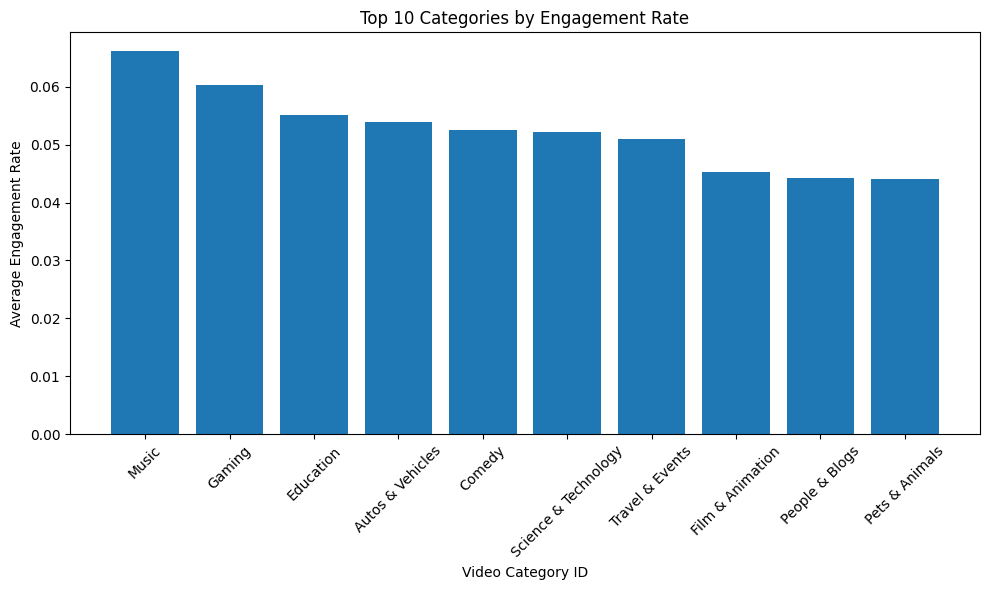

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(top_categories_engagement.index, top_categories_engagement['engagement_rate'])
plt.title('Top 10 Categories by Engagement Rate')
plt.xlabel('Video Category ID')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

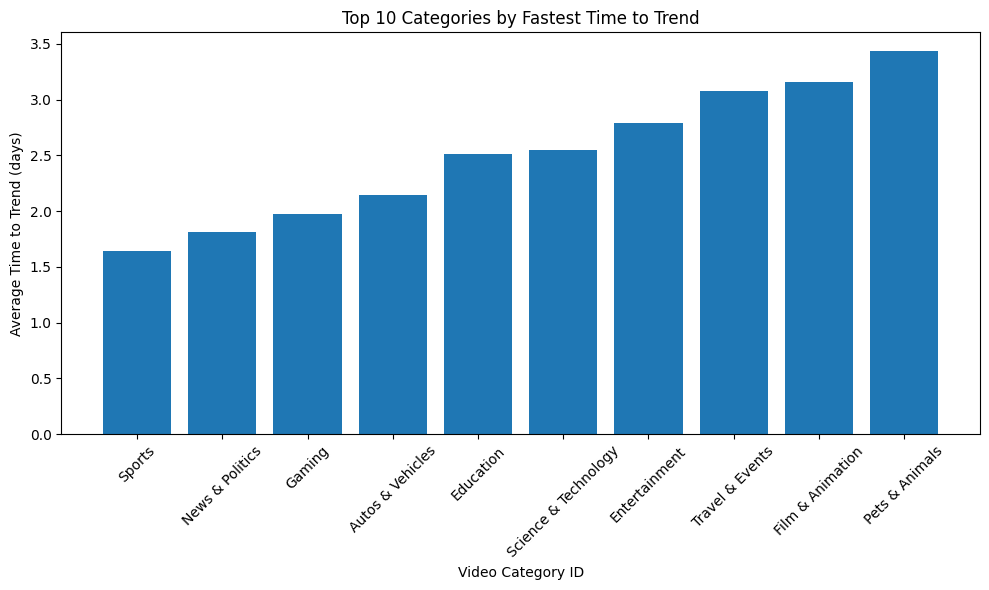

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(top_categories_trend.index, top_categories_trend['avg_time_to_trend_days'])
plt.title('Top 10 Categories by Fastest Time to Trend')
plt.xlabel('Video Category ID')
plt.ylabel('Average Time to Trend (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

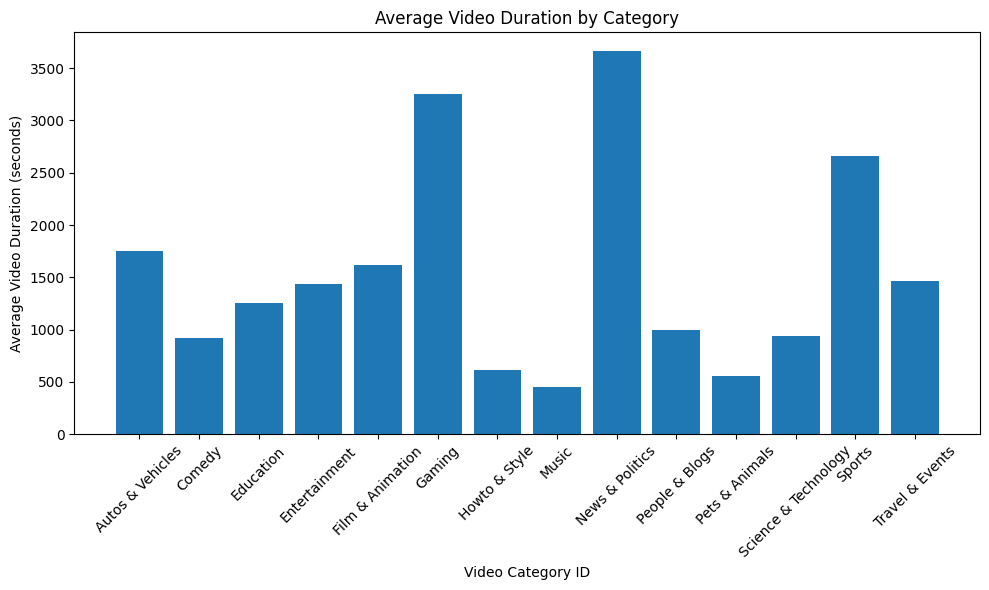

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(category_analysis_debug.index, category_analysis_debug['video_duration_seconds'])
plt.title('Average Video Duration by Category')
plt.xlabel('Video Category ID')
plt.ylabel('Average Video Duration (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

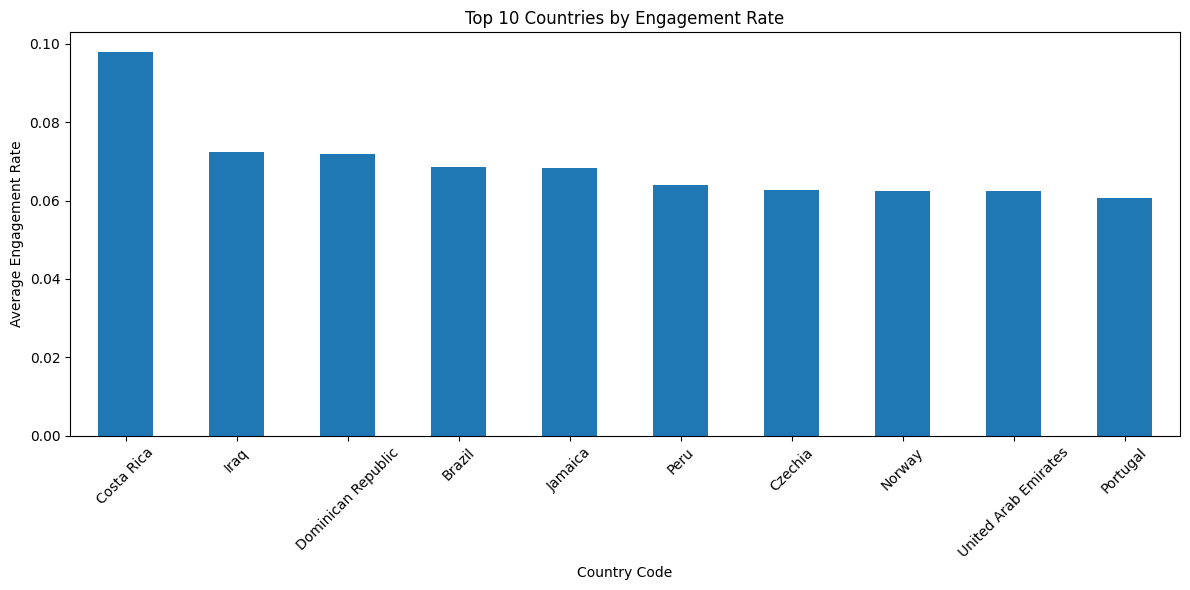

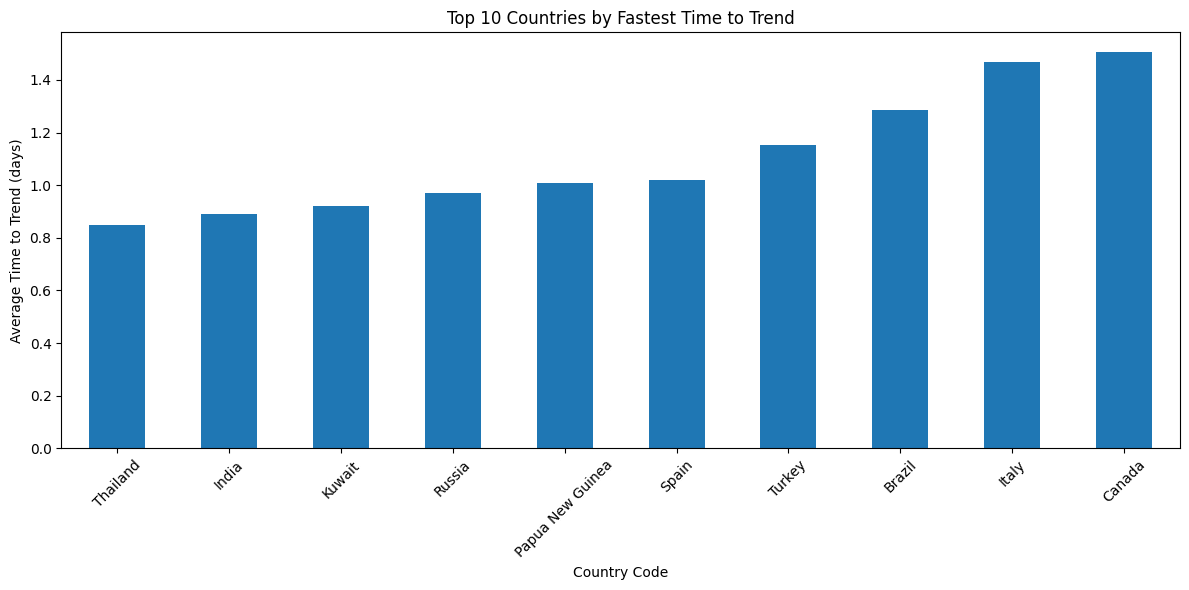

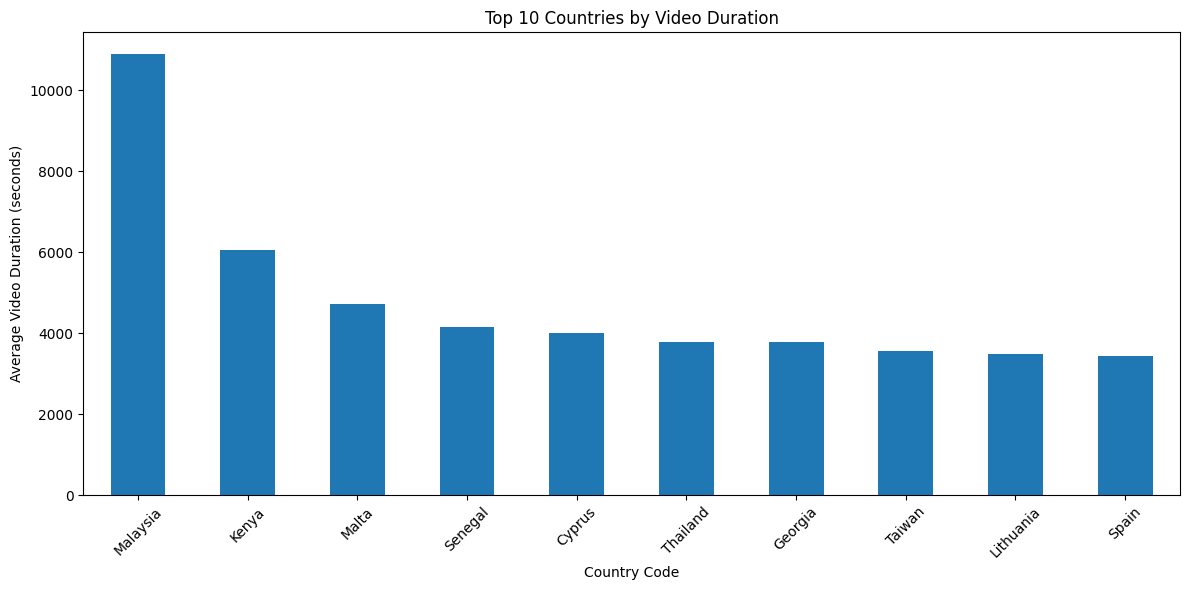

In [36]:
top_countries_engagement = country_analysis_debug.sort_values('engagement_rate', ascending=False).head(10)

top_countries_trend = country_analysis_debug.sort_values('avg_time_to_trend_days', ascending=True).head(10)

plt.figure(figsize=(12, 6))
top_countries_engagement['engagement_rate'].plot(kind='bar')
plt.title('Top 10 Countries by Engagement Rate')
plt.xlabel('Country Code')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
top_countries_trend['avg_time_to_trend_days'].plot(kind='bar')
plt.title('Top 10 Countries by Fastest Time to Trend')
plt.xlabel('Country Code')
plt.ylabel('Average Time to Trend (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
country_analysis_debug['video_duration_seconds'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Countries by Video Duration')
plt.xlabel('Country Code')
plt.ylabel('Average Video Duration (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

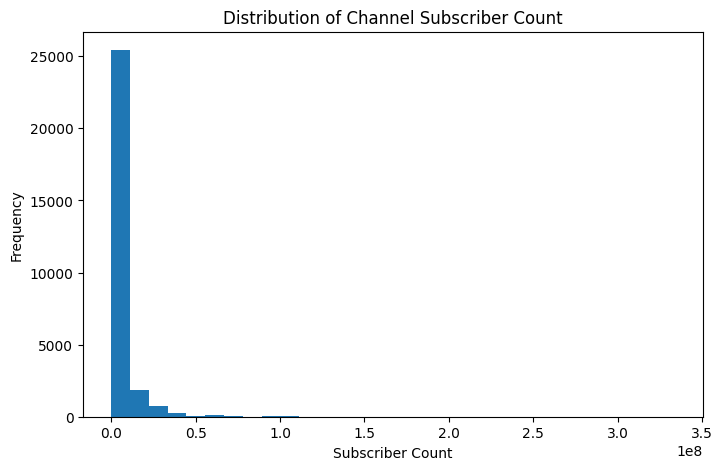

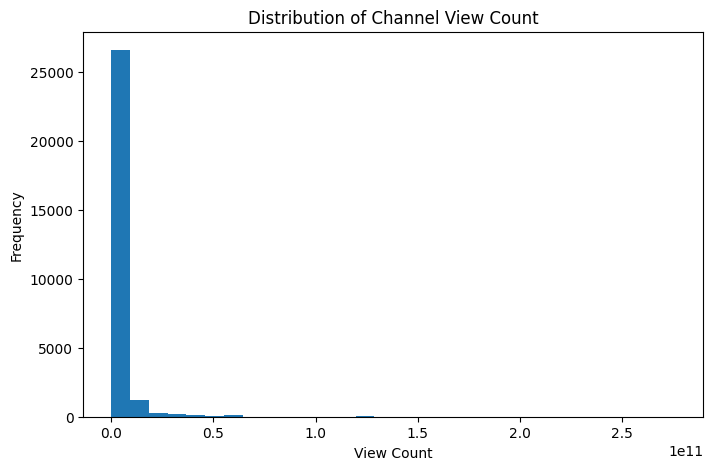

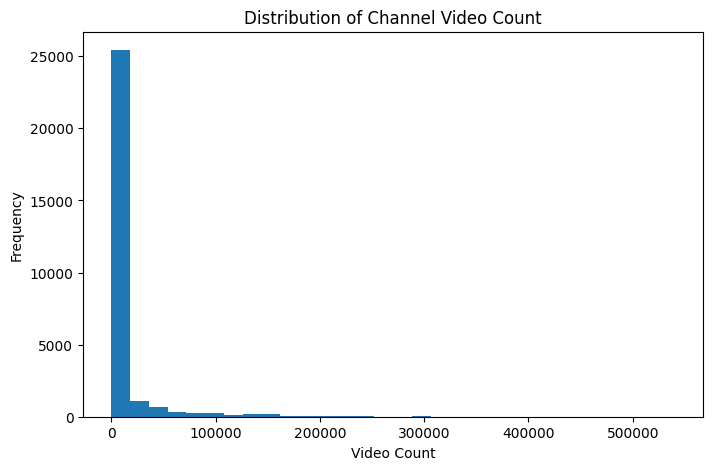

In [37]:
plt.figure(figsize=(8, 5))
plt.hist(post_data_drop_id['channel_subscriber_count'].dropna(), bins=30)
plt.title('Distribution of Channel Subscriber Count')
plt.xlabel('Subscriber Count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(post_data_drop_id['channel_view_count'].dropna(), bins=30)
plt.title('Distribution of Channel View Count')
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(post_data_drop_id['channel_video_count'].dropna(), bins=30)
plt.title('Distribution of Channel Video Count')
plt.xlabel('Video Count')
plt.ylabel('Frequency')
plt.show()

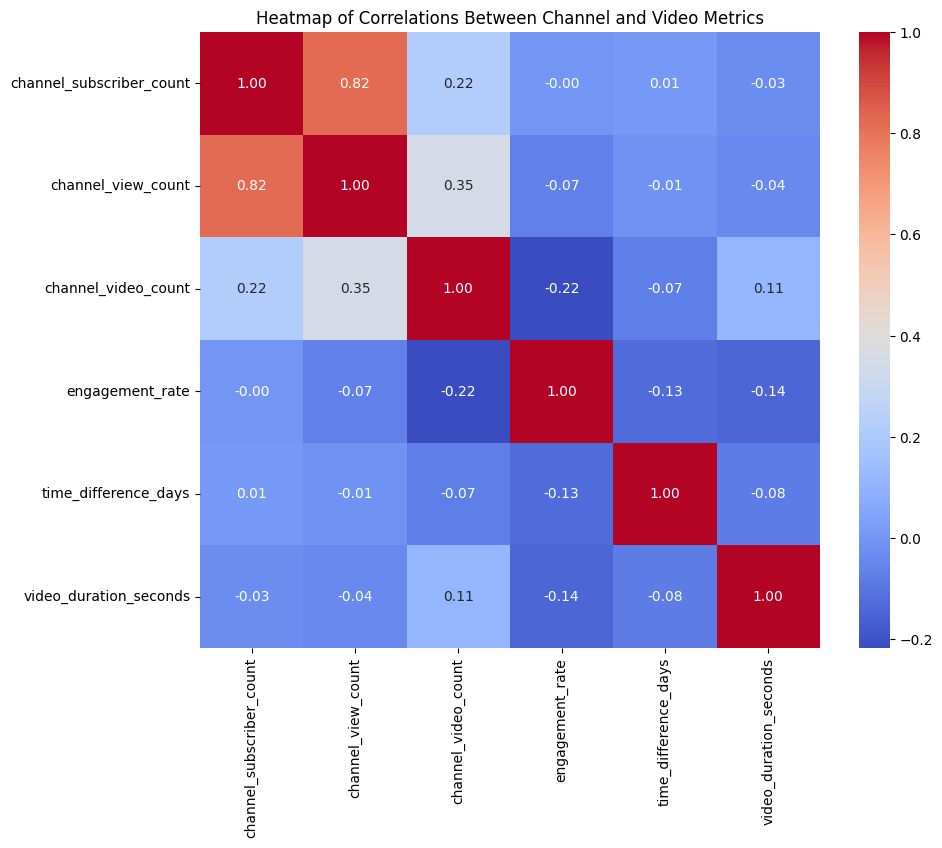

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = post_data_drop_id[
    ['channel_subscriber_count', 'channel_view_count', 'channel_video_count',
     'engagement_rate', 'time_difference_days', 'video_duration_seconds']
].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlations Between Channel and Video Metrics')
plt.show()

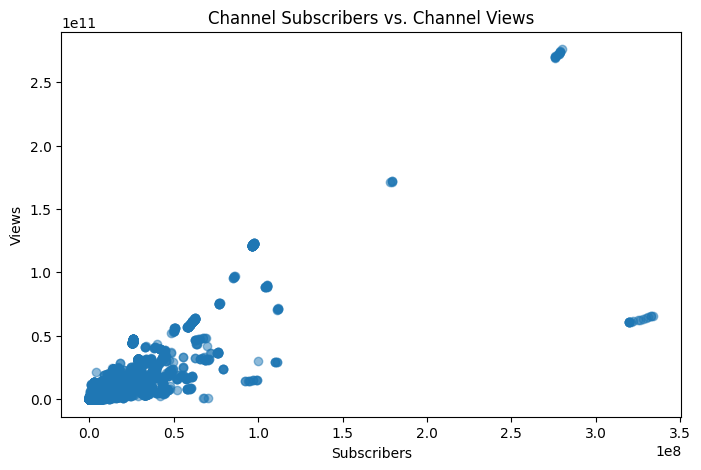

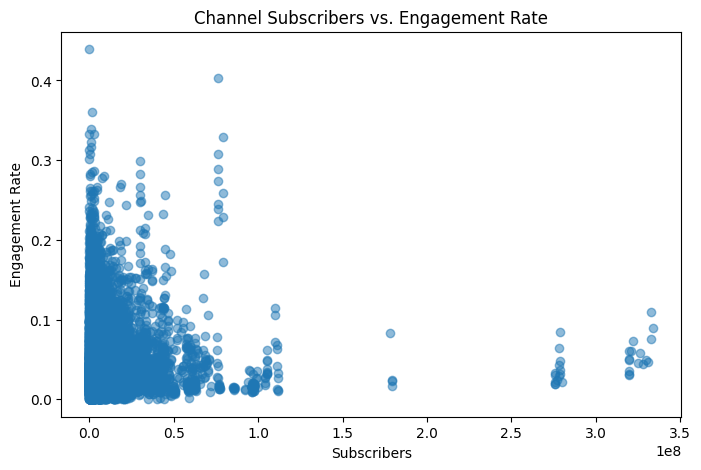

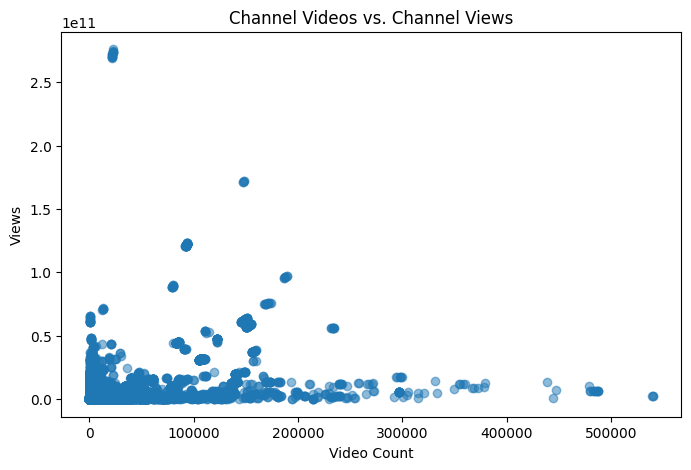

In [39]:
plt.figure(figsize=(8, 5))
plt.scatter(post_data_drop_id['channel_subscriber_count'], post_data_drop_id['channel_view_count'], alpha=0.5)
plt.title('Channel Subscribers vs. Channel Views')
plt.xlabel('Subscribers')
plt.ylabel('Views')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(post_data_drop_id['channel_subscriber_count'], post_data_drop_id['engagement_rate'], alpha=0.5)
plt.title('Channel Subscribers vs. Engagement Rate')
plt.xlabel('Subscribers')
plt.ylabel('Engagement Rate')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(post_data_drop_id['channel_video_count'], post_data_drop_id['channel_view_count'], alpha=0.5)
plt.title('Channel Videos vs. Channel Views')
plt.xlabel('Video Count')
plt.ylabel('Views')
plt.show()

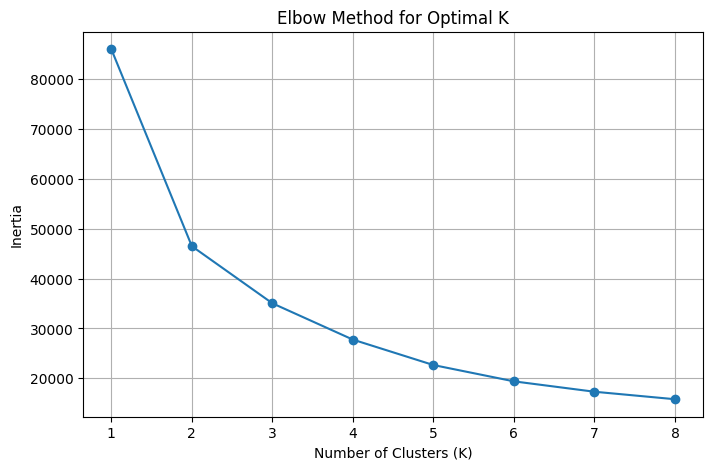

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
clustering_features = post_data_drop_id[['channel_subscriber_count', 'channel_view_count', 'channel_video_count']].dropna()
clustering_features_log = np.log1p(clustering_features)
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features_log)
clustering_features_log = np.log1p(clustering_features)
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features_log)
inertia = []
K = range(1, 9)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_features_scaled)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [41]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(clustering_features_scaled)

post_data_drop_id['channel_cluster'] = cluster_labels

cluster_centroids = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centroids_df = pd.DataFrame(
    np.expm1(cluster_centroids),
    columns=clustering_features.columns
)
cluster_centroids_df['Cluster'] = range(optimal_k)
cluster_centroids_df

,channel_subscriber_count,channel_view_count,channel_video_count,Cluster
0,6.938968e+05,2.387534e+08,935.145211,0
1,5.141411e+06,3.393710e+09,33377.196434,1
2,9.793635e+04,2.274448e+07,151.925768,2
3,6.949761e+06,2.737874e+09,903.891050,3


In [42]:
cluster_centroids_df_fixed = cluster_centroids_df.sort_values('channel_subscriber_count', ascending=True).reset_index(drop=True)
labels = ['Low', 'Medium', 'High', 'Very High']
cluster_centroids_df_fixed['Cluster Category'] = labels
cluster_centroids_df_fixed.drop(columns=['Cluster'])
cluster_centroids_df_fixed

,channel_subscriber_count,channel_view_count,channel_video_count,Cluster,Cluster Category
0,9.793635e+04,2.274448e+07,151.925768,2,Low
1,6.938968e+05,2.387534e+08,935.145211,0,Medium
2,5.141411e+06,3.393710e+09,33377.196434,1,High
3,6.949761e+06,2.737874e+09,903.891050,3,Very High


In [43]:
cluster_label_mapping = { # subscriber count
    3: 'Low',
    1: 'Medium',
    0: 'High',
    2: 'Very High'
}

post_data_drop_id['channel_cluster'] = post_data_drop_id['channel_cluster'].map(cluster_label_mapping)

post_data_drop_id[['channel_cluster', 'channel_subscriber_count', 'channel_view_count', 'channel_video_count']].head()

,channel_cluster,channel_subscriber_count,channel_view_count,channel_video_count
0,Low,11600000,464615150,43
10093,Low,14400000,3954309427,5274
10094,High,254000,79622705,36548
10095,High,1950000,446287762,920
10096,Low,3910000,762655618,952


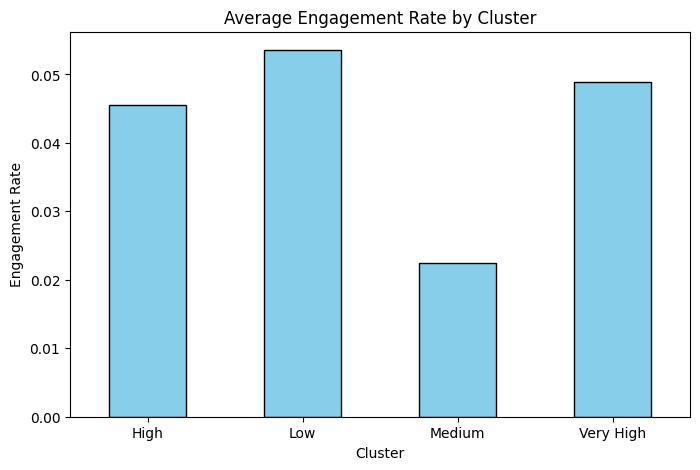

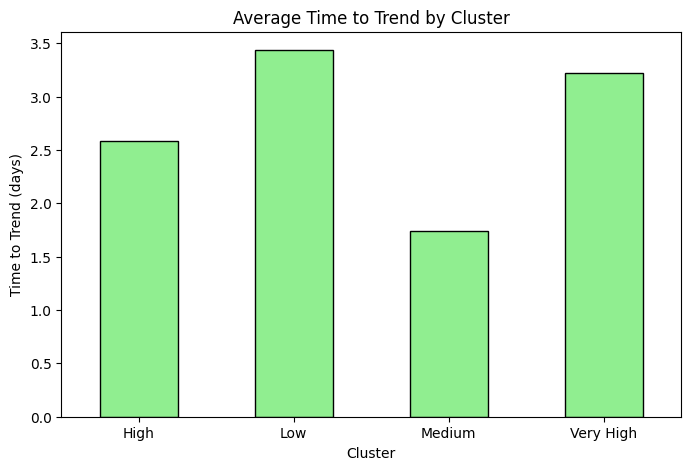

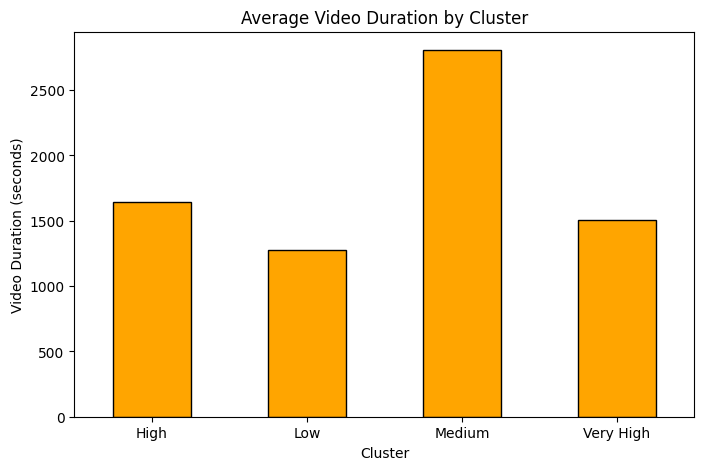

In [44]:
cluster_analysis = post_data_drop_id.groupby('channel_cluster').agg({
    'engagement_rate': 'mean',
    'time_difference_days': 'mean',
    'video_duration_seconds': 'mean',
    'channel_subscriber_count': 'mean',
    'channel_view_count': 'mean',
    'channel_video_count': 'mean'
}).rename(columns={
    'time_difference_days': 'Avg Time to Trend (days)',
    'video_duration_seconds': 'Avg Video Duration (seconds)',
    'channel_subscriber_count': 'Avg Subscribers',
    'channel_view_count': 'Avg Channel Views',
    'channel_video_count': 'Avg Channel Videos',
    'engagement_rate': 'Avg Engagement Rate'
})

plt.figure(figsize=(8, 5))
cluster_analysis['Avg Engagement Rate'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Engagement Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 5))
cluster_analysis['Avg Time to Trend (days)'].plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Time to Trend by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Time to Trend (days)')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 5))
cluster_analysis['Avg Video Duration (seconds)'].plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Video Duration by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Video Duration (seconds)')
plt.xticks(rotation=0)
plt.show()

In [45]:
post_data_drop_id.columns

Index(['video_id', 'video_published_at', 'video_trending__date',
       'video_trending_country', 'channel_id', 'video_title',
       'video_description', 'video_default_thumbnail', 'video_category_id',
       'video_tags', 'video_duration', 'video_dimension', 'video_definition',
       'video_licensed_content', 'video_view_count', 'video_like_count',
       'video_comment_count', 'channel_title', 'channel_description',
       'channel_custom_url', 'channel_published_at', 'channel_country',
       'channel_view_count', 'channel_subscriber_count',
       'channel_have_hidden_subscribers', 'channel_video_count',
       'channel_localized_title', 'channel_localized_description',
       'engagement_rate', 'time_difference', 'video_duration_seconds',
       'time_difference_days', 'channel_cluster'],
      dtype='object')

In [46]:
data = post_data_drop_id.copy()

In [47]:
data['time_to_trend_difference_seconds'] = data['time_difference'].dt.total_seconds()
data['is_weekend'] = pd.to_datetime(data['video_published_at']).dt.weekday >= 5

In [48]:
data['is_trending'] = data['time_difference'].apply(lambda x: 1 if x <= pd.Timedelta(days=1) else 0)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

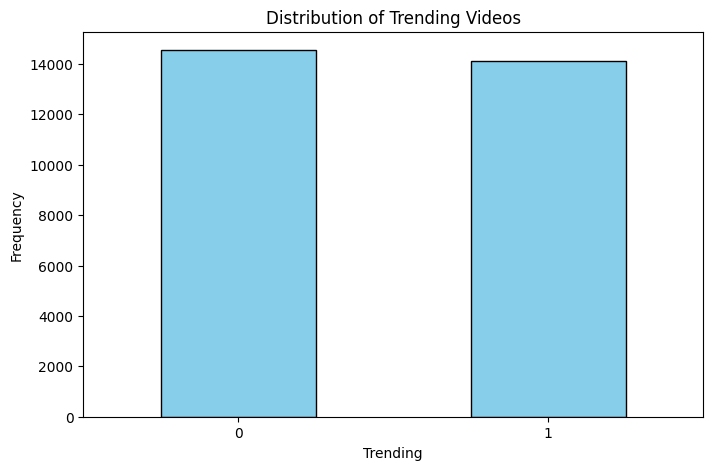

In [49]:
# plot the distribution of the target variable
plt.figure(figsize=(8, 5))
data['is_trending'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Trending Videos')
plt.xlabel('Trending')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

In [50]:
data['published_hour'] = data['video_published_at'].dt.hour
data['published_morning'] = data['published_hour'].between(6, 12)
data['published_afternoon'] = data['published_hour'].between(12, 18)
data['published_evening'] = data['published_hour'].between(18, 24)
data['published_night'] = data['published_hour'].between(0, 6)

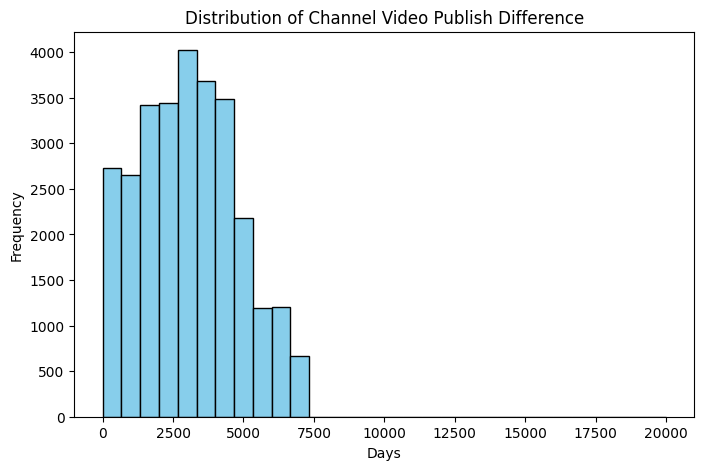

In [51]:
data['channel_video_channel_publish_difference'] = (data['video_published_at'] - data['channel_published_at']).dt.days
# plot 
plt.figure(figsize=(8, 5))
data['channel_video_channel_publish_difference'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Channel Video Publish Difference')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

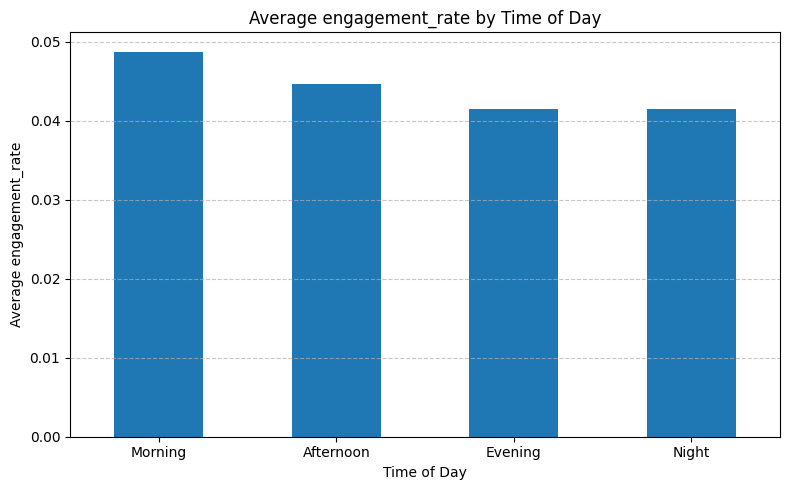

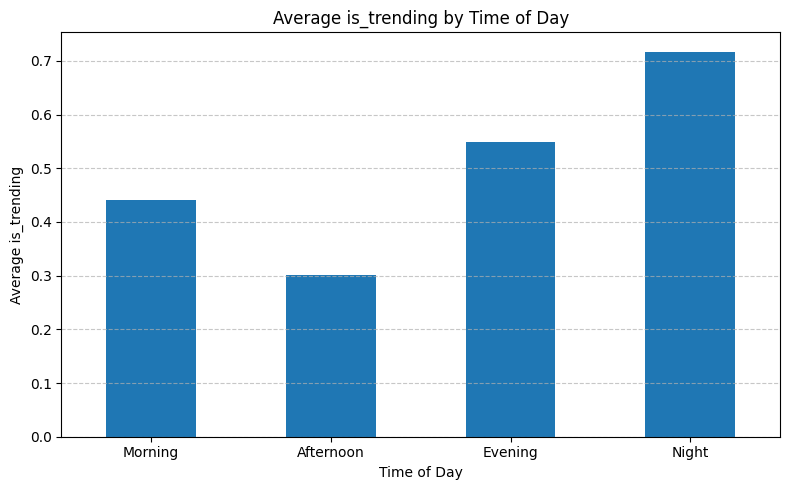

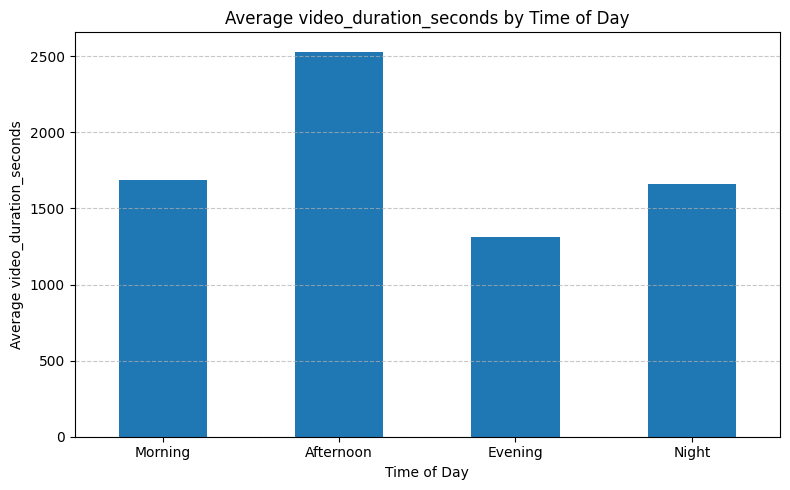

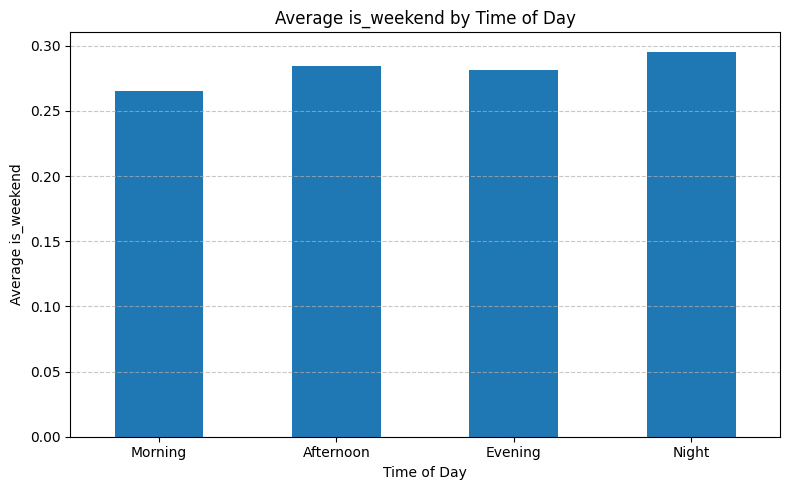

In [52]:
time_of_day_columns = ['published_morning', 'published_afternoon', 'published_evening', 'published_night']

data['time_of_day'] = data[time_of_day_columns].idxmax(axis=1)

metrics = ['engagement_rate', 'is_trending', 'video_duration_seconds', 'is_weekend']
time_of_day_analysis = data.groupby('time_of_day')[metrics].mean()

for metric in metrics:
    plt.figure(figsize=(8, 5))
    time_of_day_analysis[metric].plot(kind='bar', rot=0)
    plt.title(f'Average {metric} by Time of Day')
    plt.xlabel('Time of Day')
    plt.ylabel(f'Average {metric}')
    plt.xticks([0, 1, 2, 3], ['Morning', 'Afternoon', 'Evening', 'Night'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

<Figure size 2160x1440 with 0 Axes>

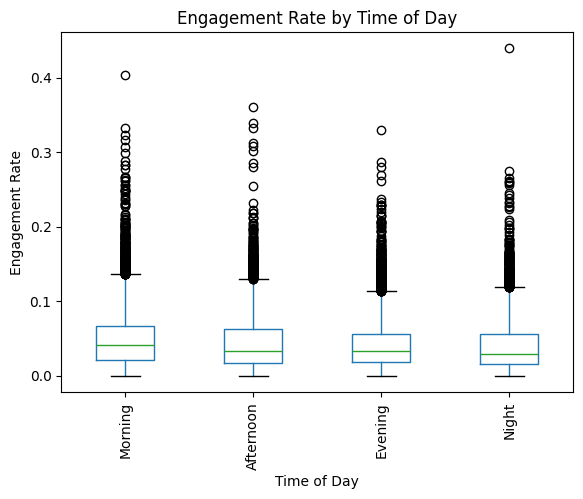

In [53]:
plt.figure(figsize=(18, 12), dpi=120)
data.boxplot(column='engagement_rate', by='time_of_day', grid=False)
plt.title('Engagement Rate by Time of Day')
plt.suptitle('')
plt.xlabel('Time of Day')
plt.ylabel('Engagement Rate')
# rotato to 90 degrees x axis
plt.xticks([1, 2, 3, 4], ['Morning', 'Afternoon', 'Evening', 'Night'], rotation=90)
plt.show()

In [54]:
data.isnull().sum()

video_id                                    0
video_published_at                          0
video_trending__date                        0
video_trending_country                      0
channel_id                                  0
video_title                                 0
video_description                           0
video_default_thumbnail                     0
video_category_id                           0
video_tags                                  0
video_duration                              0
video_dimension                             0
video_definition                            0
video_licensed_content                      0
video_view_count                            0
video_like_count                            0
video_comment_count                         0
channel_title                               0
channel_description                         0
channel_custom_url                          0
channel_published_at                        0
channel_country                   

In [55]:
data.reset_index(drop=True, inplace=True)
data.isnull().sum()

video_id                                    0
video_published_at                          0
video_trending__date                        0
video_trending_country                      0
channel_id                                  0
video_title                                 0
video_description                           0
video_default_thumbnail                     0
video_category_id                           0
video_tags                                  0
video_duration                              0
video_dimension                             0
video_definition                            0
video_licensed_content                      0
video_view_count                            0
video_like_count                            0
video_comment_count                         0
channel_title                               0
channel_description                         0
channel_custom_url                          0
channel_published_at                        0
channel_country                   

In [56]:
data.is_trending.value_counts()

is_trending
0    14551
1    14116
Name: count, dtype: int64

In [57]:
data.to_csv('data_youtube_cleaned_first_final.csv', index=False)